# Lyman alpha fitting

The equation for the cross section is (Diplas \& Savage 1994)

$ \sigma(\lambda) = 4.26e^{-20} \text{cm}^2 / [6.04e^{-10}+ (\lambda - \lambda_0)^2] $

where $\lambda_0 = 1215.67 \AA$. We might need a velocity doppler shift parameter for $\lambda_0$. The model for the spectrum, with $N = N(\text{H I})$ as a parameter, is written as

$ f_m(\lambda; N) = f_c(\lambda) \exp(-N \sigma(\lambda)) $.


The function $f_c(\lambda)$ describes the continuum, the flux without any lines. It is usually a constant or 1st order approximation, determined by fitting or sometimes by eye. $N(\text{HI})$ can be found by minimizing a $\chi^2$ function

$ \chi^2(N) = \frac{1}{n - 1} \sum_i \sigma
_c^{-1} (f_i - f_m(\lambda_i; N))^2$. 

Here, a suitable noise model $\sigma_c$ needs to be chosen. In DS94, $\sigma_c = \text{constant} \times \exp(\sigma(\lambda_i) N)$. This is not an error on the measurement, but rather a factor to treat the other features of the spectrum as noise. For the constant, they use the RMS deviation with respect to $f_c$, over a wavelength range outside the line, deemed to have similar noise as the line wings. 

The workflow goes as follows:
1. Find a suitable approximation for the continuum.
2. Find a suitable noise level with respect to the continuum.
2. Mask wavelengths that have troublesome features.
3. Optimize the $\chi^2$ function for the remaining data points $(\lambda_i, f_i)$, minimizing the differences between $f_i$ and $f_m(\lambda_i)$.


In [54]:
def sigma(l):
    l0 = 1215.67
    return 4.26e-20 / (6.04e-10 + np.square(l - l0))
    
def fmodel(fcontinuum, NHI):
    return lambda l : fcontinuum(l) * np.exp(-NHI * sigma(l))



In [47]:
from matplotlib import pyplot as plt
import numpy as np

def prepare_axes():
    plt.xlabel('wavelength')
    plt.ylabel('flux (erg cm$^{-2}$s$^{-1}\\AA^{-1}$)')

def plot_iue(table):
    plt.plot(table['WAVELENGTH'], table['NET'])
    prepare_axes()
    
def plot_order(table, index):
    flux = table[index]['NET']
    wavs = [table[index]['WAVELENGTH'] + table[index]['DELTAW'] * i for i in range(len(flux))]
    plt.plot(wavs, flux)
    
def plot_function_at_lya(f, ylabel='f(x)', *args):
    x = np.linspace(1100, 1300, 1000)
    y = f(x, *args)
    plt.xlabel('wavelength')
    

In [48]:
# open some data
from astropy.io import fits
from astropy.table import Table

spectrum_file = 'data/HD094493/swp49768.mxhi.gz'
fits.info(spectrum_file)

Filename: data/HD094493/swp49768.mxhi.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     424   ()      
  1  MEHI          1 BinTableHDU     61   60R x 17C   [1B, 1I, 1D, 1I, 1D, 1E, 1E, 768E, 768E, 768E, 768I, 768E, 768E, 1I, 1I, 1E, 7E]   


In [49]:
t = Table.read(spectrum_file)
t

ORDER,NPOINTS,WAVELENGTH,STARTPIX,DELTAW,SLIT HEIGHT,LINE_FOUND,NET [768],BACKGROUND [768],NOISE [768],QUALITY [768],RIPPLE [768],ABS_CAL [768],START-BKG,END-BKG,SCALE_BKG,COEFF [7]
,,ANGSTROM,PIXEL,ANGSTROM,PIXEL,PIXEL,FN,FN,FN,,FN,ERG/CM2/S/A,PIXEL,PIXEL,,
uint8,int16,float64,int16,float64,float32,float32,float32,float32,float32,int16,float32,float32,int16,int16,float32,float32
125,532,1098.1692580057525,116,0.028546430982993237,4.720001,128.39,0.0 .. 0.0,-1.8529843 .. 41.64343,0.0 .. 0.0,-2 .. -2,0.0 .. 0.0,0.0 .. 0.0,274,493,304.23505,3.2869987 .. 0.0
124,542,1106.8630634771735,111,0.028765254793322096,4.720001,132.99,0.0 .. 0.0,-1.7358428 .. 41.549026,0.0 .. 0.0,-2 .. -2,0.0 .. 0.0,0.0 .. 0.0,193,559,478.9347,1.9522327 .. 0.0
123,550,1115.7281980105925,107,0.028987781329211114,4.720001,137.76,0.0 .. 0.0,-1.6975065 .. 41.78515,0.0 .. 0.0,-2 .. -2,0.0 .. 0.0,0.0 .. 0.0,220,559,410.117,2.3387604 .. 0.0
122,558,1124.7395970157015,103,0.02921411281488964,4.720001,142.7,0.0 .. 0.0,-2.0916648 .. 42.0432,0.0 .. 0.0,-2 .. -2,0.0 .. 0.0,0.0 .. 0.0,166,604,536.4757,1.7433746 .. 0.0
121,568,1133.871412916893,98,0.02944435485396653,4.719986,147.82,0.0 .. 0.0,-1.2521095 .. 41.845005,0.0 .. 0.0,-2 .. -2,0.0 .. 0.0,0.0 .. 0.0,166,628,538.02185,1.7162596 .. 0.0
120,576,1143.1860166556708,94,0.02967861654823642,4.3099976,153.12,0.0 .. 0.0,10.891592 .. 37.957573,0.0 .. 0.0,-2 .. -2,0.0 .. 0.0,0.0 .. 0.0,139,652,595.25354,1.523904 .. 0.0
119,586,1152.6281183465899,89,0.029917010790995333,4.0599976,158.92,0.0 .. 0.0,30.619741 .. 35.45947,0.0 .. 0.0,-2 .. -2,0.0 .. 0.0,0.0 .. 0.0,139,652,588.79114,1.5402112 .. 0.0
118,592,1162.2914401548155,86,0.030159654180336063,4.119995,164.71962,0.0 .. 0.0,48.185734 .. 36.321846,0.0 .. 0.0,-2 .. -2,0.0 .. 0.0,0.0 .. 0.0,112,679,625.4597,1.4487414 .. 0.0


In [50]:
# check the contents of one row
row = 1
print(t[row]['WAVELENGTH'])
t[row]['NET'].shape

1106.8630634771735


(768,)

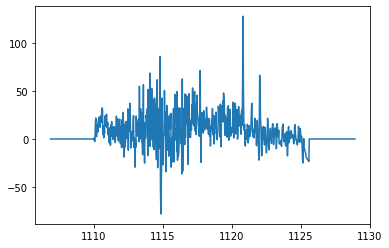

In [51]:
plot_order(t, 1)